# 미니 배치 실습 #1

In [19]:
# MNIST 데이터는 텐서플로우 안에 내장된 숫자 필기체 이미지 데이터이다.
# 약 6만개의 이미지가 저장되어 있다.
# NMIST 데이터에서 12개의 샘플을 무작위로 뽑는 코드를 만들어보자.

In [20]:
import numpy as np
import tensorflow as tf

# 데이터를 학습 데이터와 테스트 데이터로 나눈다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

data_size = x_train.shape[0]
batch_size = 12 # 배치 크기

selected = np.random.choice(data_size, batch_size)
print(selected)
x_batch = x_train[selected]
y_batch = y_train[selected]

[30561 31520 52759 23025 59166 49200 53162 44332 54291  7303 49175 12911]


In [21]:
def MSE(t, y) :
    size = y.shape[0]
    return 0.5 * np.sum((y-t) ** 2) / size

# 미니 배치의 구현

In [22]:
import numpy as np

# 시그모이드 함수 구현
def sigmoid(x) :
    return 1.0 / (1.0 + np.exp(-x))

# 시그모이드 함수의 미분치
def sigmoid_deriv(x) :
    return x * (1-x)

# 입력 유닛의 개수, 은닉 유닛의 개수, 출력 유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 샘플과 정답
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

# 가중치를 -1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2 * np.random.random((inputs, hiddens)) - 1
W2 = 2 * np.random.random((hiddens, outputs)) - 1
B1 = np.zeros(hiddens)
B2 = np.zeros(outputs)

# 순방향 전파 계산
def predict(x) :
    layer0 = x
    Z1 = np.dot(layer0, W1) + B1
    layer1 = sigmoid(Z1)
    Z2 = np.dot(layer1, W2) + B2
    layer2 = sigmoid(Z2)
    return layer0, layer1, layer2

# 역방향 전파 계산
def fit() :
    global W1, W2, B1, B2
    for i in range(60000) :
        layer0, layer1, layer2 = predict(X)
        layer2_error = layer2 - T

        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        layer1_error = np.dot(layer2_delta, W2.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        W2 += -learning_rate * np.dot(layer1.T, layer2_delta) / 4.0
        W1 += -learning_rate * np.dot(layer0.T, layer1_delta) / 4.0
        B2 += -learning_rate * np.sum(layer2_delta, axis = 0) / 4.0
        B1 += -learning_rate * np.sum(layer1_delta, axis = 0) / 4.0

def test() :
    for x, y in zip(X, T) :
        x = np.reshape(x, (1, -1))
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()

[[0 0]] [0] [[0.01539626]]
[[0 1]] [1] [[0.98676414]]
[[1 0]] [1] [[0.98677556]]
[[1 1]] [0] [[0.01366182]]


# XOR를 학습하는 MLP 작성

In [23]:
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 2, input_shape = (2,), activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.3))

model.summary()


C:\Users\황주신\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size = 1, epochs = 10000)
print(model.predict(X))

Epoch 1/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2545  
Epoch 2/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2370 
Epoch 3/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2559 
Epoch 4/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2577 
Epoch 5/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2642 
Epoch 6/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2543 
Epoch 7/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2590 
Epoch 8/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2595 
Epoch 9/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2504 
Epoch 10/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2534 
Epoch 11/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2567 
Epoch 12/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2620 
Epoch 13/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2572 
Epoch 14/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2568 
Epoch 15/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

KeyboardInterrupt: 

# 케라스를 사용하는 3가지 방법

In [27]:
# 1) Sequential 모델을 만들고 모델에 필요한 레이어를 추가하는 방법

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(10, input_shape = (30,), activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(6, activation = 'tanh'))
model.add(Dense(2, activation = 'softmax'))

model.compile(Adam(learning_rate = 0.04), 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466 (1.82 KB)

 Trainable params: 466 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# 2) 함수형 API를 사용하는 방법

from keras import Input
from keras import Model

inputs = Input(shape = (30, ))
layer0 = Dense(10, activation = "tanh")(inputs)
layer1 = Dense(8, activation = "tanh")(layer0)
layer2 = Dense(6, activation = "tanh")(layer1)
prediction = Dense(2, activation = "softmax")(layer2)

model = Model(inputs = inputs, outputs = prediction)

model.compile(Adam(learning_rate = 0.04), 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466 (1.82 KB)

 Trainable params: 466 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# 3) Model 클래스 상속하기

class SimpleMLP(Model) :
    def __init__(self, num_classes = 2):
        super(SimpleMLP, self).__init__(name = 'mlp')
        self.num_classes = num_classes
        
        self.dense1 = Dense(32, activation = 'sigmoid')
        self.dense2 = Dense(num_classes, activation = 'sigmoid')

    def call(self, inputs) :
        x = self.dense1(inputs)
        return self.dense2(x)
    
model = SimpleMLP()

model.compile(Adam(learning_rate = 0.04), 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# 케라스를 이용한 MNIST 숫자 인식

In [35]:
# 숫자 데이터 가져오기

import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
test_images.shape

(10000, 28, 28)

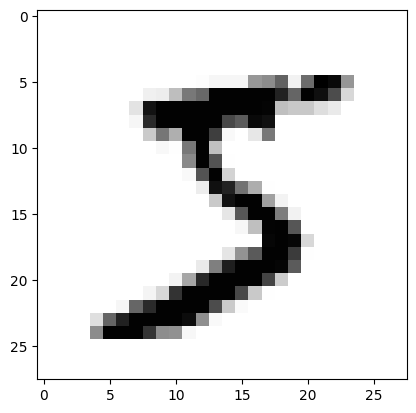

In [39]:
plt.imshow(train_images[0], cmap = "Greys")

In [41]:
# 신경망 모델 구축하기

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation = 'relu', input_shape = (784, )))
model.add(tf.keras.layers.Dense(10, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])

C:\Users\황주신\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# 데이터 전처리
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [48]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [52]:
# 학습

model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도 : ', test_acc)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1125 - loss: 0.0900
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1094 - loss: 0.0900
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1122 - loss: 0.0900
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1108 - loss: 0.0900
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1115 - loss: 0.0900
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1160 - loss: 0.0900
테스트 정확도 :  0.11349999904632568


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1098 - loss: 0.0900
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1147 - loss: 0.0900
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1122 - loss: 0.0900
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1125 - loss: 0.0900
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1121 - loss: 0.0900


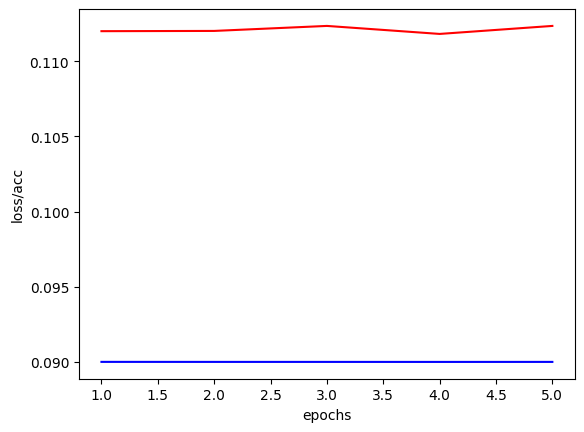

In [53]:
# 그래프 그리기
history = model.fit(train_images, train_labels, epochs = 5, batch_size = 128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, acc, 'r', label = 'Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

In [ ]:
# 테스트하기

import cv2 as cv

image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255 - image
image /= 255.0

plt.imshow(image.reshape(28, 28), cmap = 'Greys')
plt.show()